In [12]:
import pandas as pd

In [13]:
df_ours = pd.read_csv('geodesics_ours.csv')
df_dijk = pd.read_csv('dijkstra_results.csv')
df_density = pd.read_csv('geodesics_density.csv')
df_no_density = pd.read_csv('geodesics_no_density.csv')

In [14]:
df_ours

,name,length_corr,length_mse,dist2geod
0,torus_5_0.1,0.967820,9.425539,0.057363
1,torus_none_0.1,0.986785,8.581519,0.059414
2,torus_15_0.7,0.618326,13.566960,1.078428
3,torus_15_0.1,0.959449,27.062931,0.046611
4,torus_50_0.1,0.937452,33.055943,0.108530
5,torus_15_0.3,0.897052,18.595410,0.279907
6,torus_15_0.5,0.816329,15.998278,0.594861
7,torus_10_0.1,0.916531,14.538361,0.042081
8,saddle_15_0.1,0.852847,3.063656,0.087255
9,saddle_15_0.7,0.180747,6.517948,2.457350


In [15]:
df = df_ours[['name', 'length_corr']].merge(df_dijk[['name', 'length_corr']], on='name', how='outer', suffixes=('', '_dijk'))
df = df.merge(df_density[['name', 'length_corr']], on='name', how='outer', suffixes=('', '_density'))
df = df.merge(df_no_density[['name', 'length_corr']], on='name', how='outer', suffixes=('', '_no_density'))

In [16]:
df['mfd'] = df['name'].apply(lambda x: x.split('_')[0])
df['rot_dim'] = df['name'].apply(lambda x: x.split('_')[1])
df['noise'] = df['name'].apply(lambda x: x.split('_')[2])

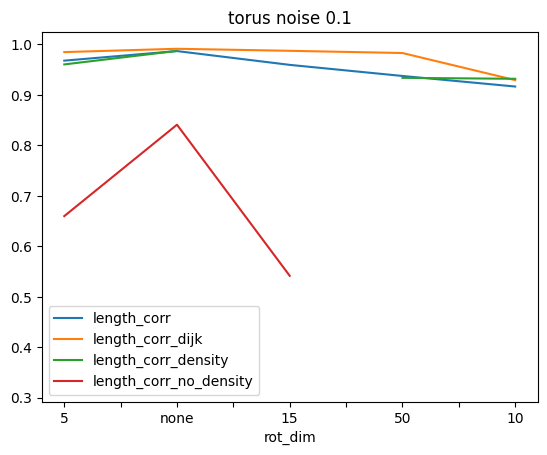

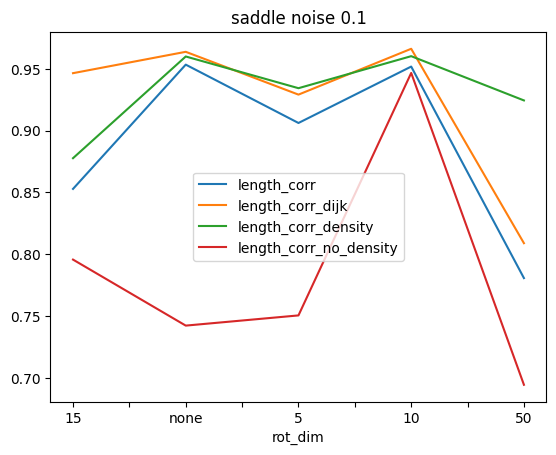

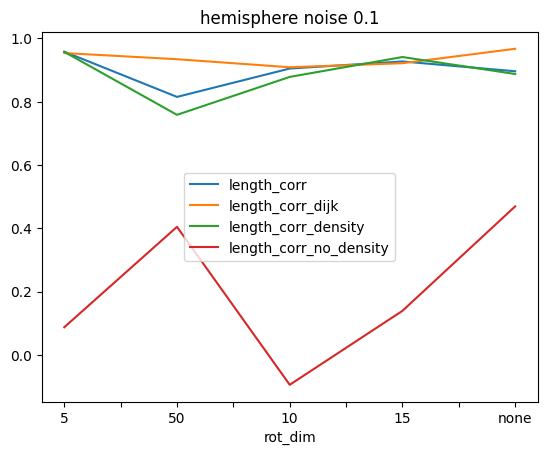

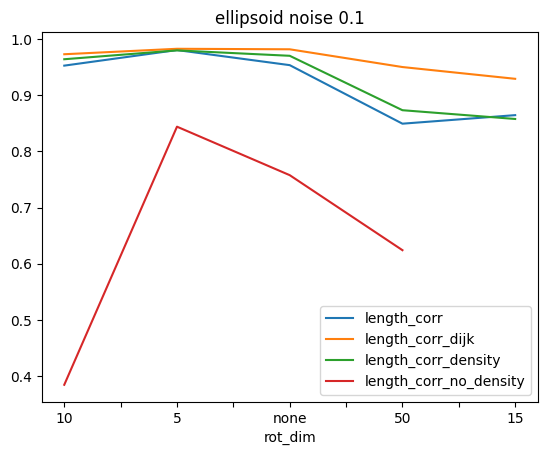

In [17]:
for name in df['mfd'].unique():
    df[(df['noise'] == '0.1') & (df['mfd'] == name)].plot(x='rot_dim', y=['length_corr', 'length_corr_dijk', 'length_corr_density', 'length_corr_no_density'], title=name + ' noise 0.1')

In [18]:
df

,name,length_corr,length_corr_dijk,length_corr_density,length_corr_no_density,mfd,rot_dim,noise
0,torus_5_0.1,0.967820,0.984775,0.960356,0.659723,torus,5,0.1
1,torus_none_0.1,0.986785,0.991333,0.987134,0.840864,torus,none,0.1
2,torus_15_0.7,0.618326,0.686840,0.478949,NaN,torus,15,0.7
3,torus_15_0.1,0.959449,0.987310,NaN,0.541425,torus,15,0.1
4,torus_50_0.1,0.937452,0.982935,0.933761,NaN,torus,50,0.1
5,torus_15_0.3,0.897052,0.925945,0.907351,0.575897,torus,15,0.3
6,torus_15_0.5,0.816329,0.874783,0.821626,NaN,torus,15,0.5
7,torus_10_0.1,0.916531,0.929221,0.931861,0.325492,torus,10,0.1
8,saddle_15_0.1,0.852847,0.946463,0.877697,0.795664,saddle,15,0.1
9,saddle_15_0.7,0.180747,0.035129,0.084417,0.579593,saddle,15,0.7


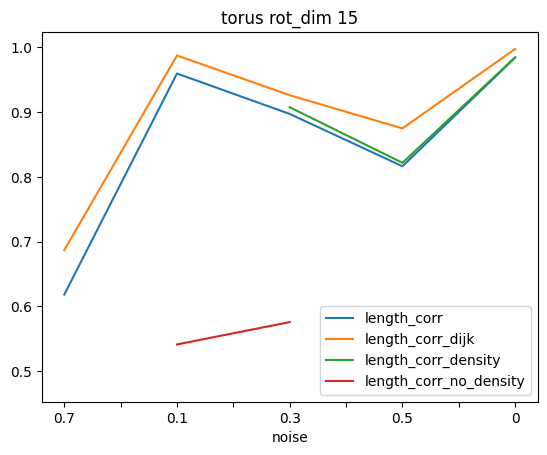

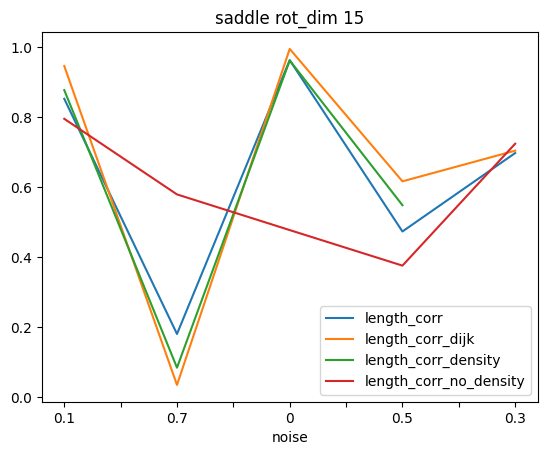

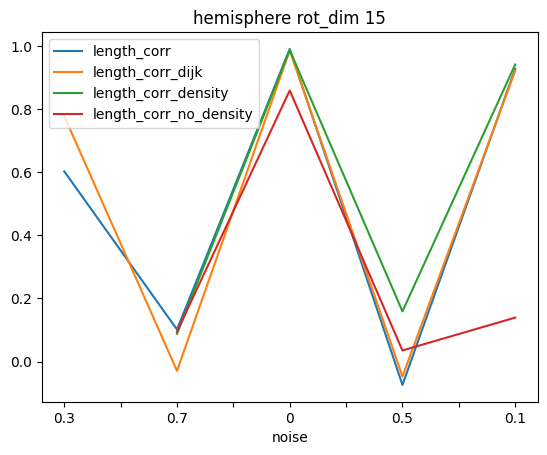

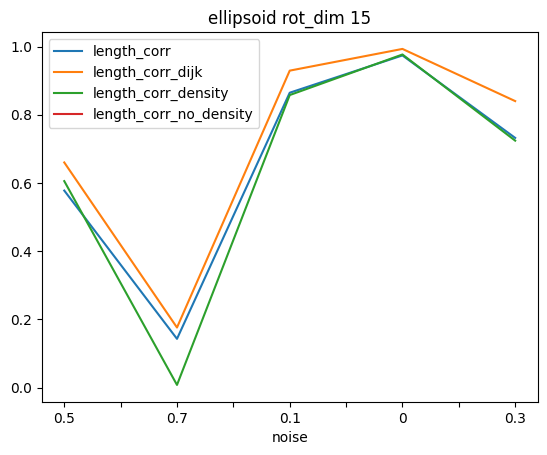

In [19]:
for name in df['mfd'].unique():
    df[(df['rot_dim'] == '15') & (df['mfd'] == name)].plot(x='noise', y=['length_corr', 'length_corr_dijk', 'length_corr_density', 'length_corr_no_density'], title=name + ' rot_dim 15')

In [20]:
df = df_ours[['name', 'dist2geod']].merge(df_dijk[['name', 'dist2geod']], on='name', how='outer', suffixes=('', '_dijk'))
df = df.merge(df_density[['name', 'dist2geod']], on='name', how='outer', suffixes=('', '_density'))
df = df.merge(df_no_density[['name', 'dist2geod']], on='name', how='outer', suffixes=('', '_no_density'))
df['mfd'] = df['name'].apply(lambda x: x.split('_')[0])
df['rot_dim'] = df['name'].apply(lambda x: x.split('_')[1])
df['noise'] = df['name'].apply(lambda x: x.split('_')[2])

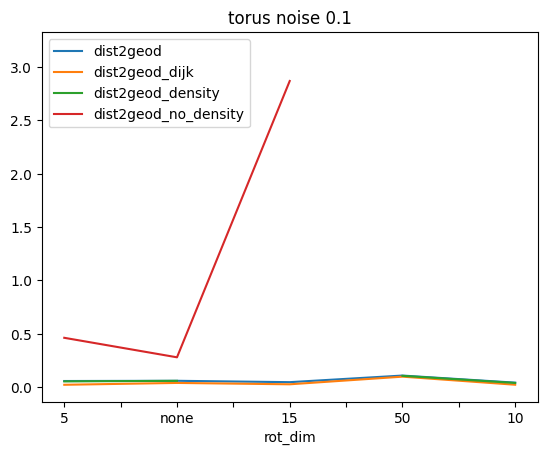

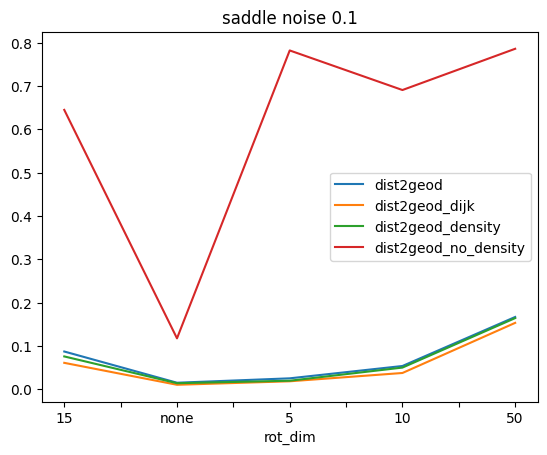

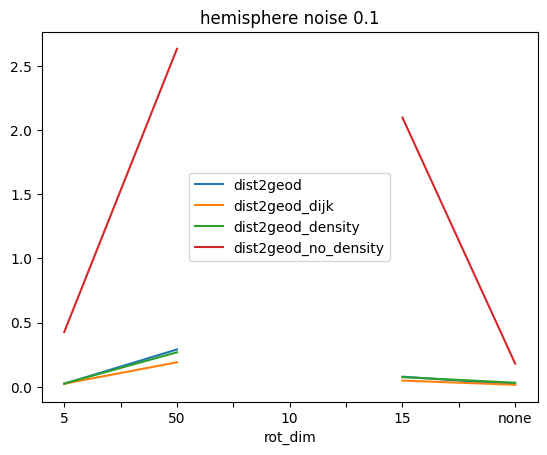

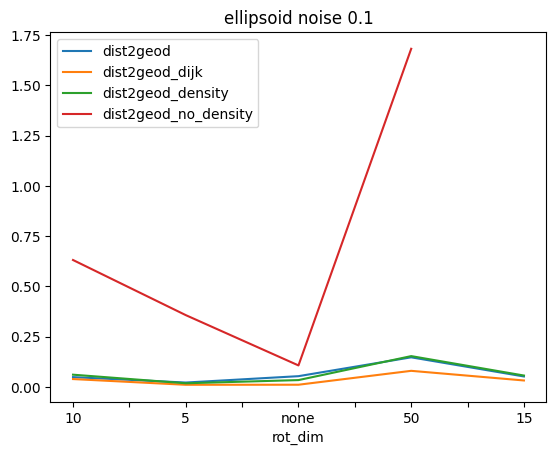

In [21]:
for name in df['mfd'].unique():
    df[(df['noise'] == '0.1') & (df['mfd'] == name)].plot(x='rot_dim', y=['dist2geod', 'dist2geod_dijk', 'dist2geod_density', 'dist2geod_no_density'], title=name + ' noise 0.1')

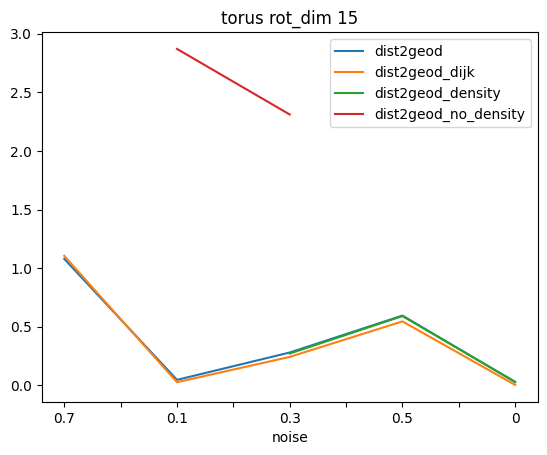

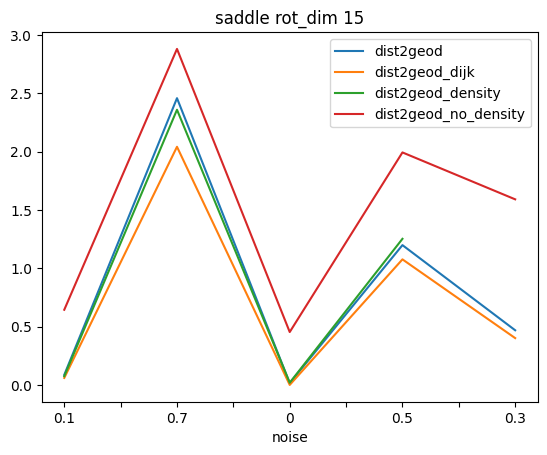

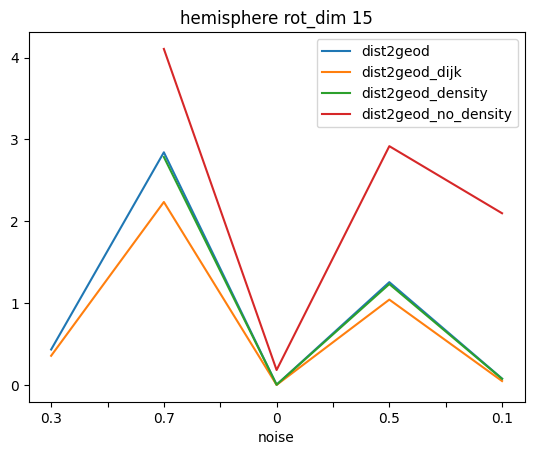

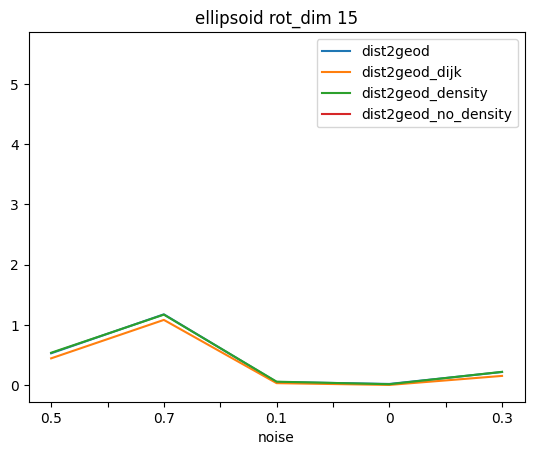

In [22]:
for name in df['mfd'].unique():
    df[(df['rot_dim'] == '15') & (df['mfd'] == name)].plot(x='noise', y=['dist2geod', 'dist2geod_dijk', 'dist2geod_density', 'dist2geod_no_density'], title=name + ' rot_dim 15')